# Fake Job Posting
I've divided this notebook into the following parts
1. EDA
2. Model Creation [⏱WIP]
3. Model Evaluation [📌Not started]


In [30]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv


In [31]:
data = pd.read_csv('/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB
None


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## EDA
I've divided the EDA into two parts.
1. First, we'll try to understand which columns have null values in the dataset.
2. Then, we'll fill the missing values in the dataset
3. We'll find the cardinality of the columns and plot the categorical columns

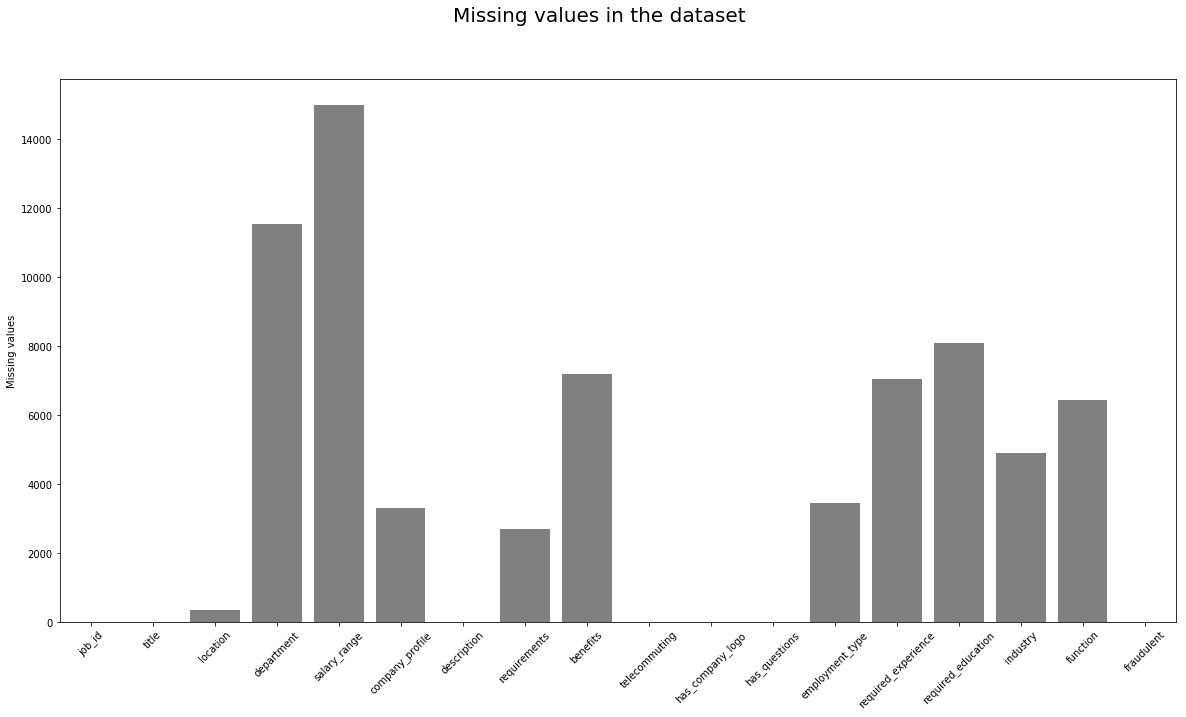

In [32]:
null_values = data.isnull().sum()
plt.figure(figsize = (20,10))
sns.barplot(null_values.index, null_values, color = 'grey')
plt.suptitle('Missing values in the dataset', size = 20)
plt.ylabel('Missing values')
plt.xticks(rotation = '45')
plt.show()

In [33]:
categorical_columns = []
for col in data.columns:
    print(f'Unique rows in {col}:', data[col].nunique())
    if data[col].nunique() < 15:
        categorical_columns.append(col)
print('Categorical columns:',categorical_columns)

Unique rows in job_id: 17880
Unique rows in title: 11231
Unique rows in location: 3105
Unique rows in department: 1337
Unique rows in salary_range: 874
Unique rows in company_profile: 1709
Unique rows in description: 14801
Unique rows in requirements: 11968
Unique rows in benefits: 6205
Unique rows in telecommuting: 2
Unique rows in has_company_logo: 2
Unique rows in has_questions: 2
Unique rows in employment_type: 5
Unique rows in required_experience: 7
Unique rows in required_education: 13
Unique rows in industry: 131
Unique rows in function: 37
Unique rows in fraudulent: 2
Categorical columns: ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent']


**So out of 17 features in our input, 6 are categorical.**
<br><br>
Now, let's relace the NULL values in the text columns by empty strings

In [34]:
for col in list(set(data.columns) - set(categorical_columns)):
    if data[col].dtypes == 'object':
        data[col] = data[col].fillna('')
print(data.isnull().sum())

job_id                    0
title                     0
location                  0
department                0
salary_range              0
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry                  0
function                  0
fraudulent                0
dtype: int64


Next, we'll replace the missing values in the categorical columns by setting them as unavailable

In [35]:
data['employment_type'] = data['employment_type'].fillna('Employement_Unavailable')
data['required_experience'] = data['required_experience'].fillna('Experience_Unavailable')
data['required_education'] = data['required_education'].fillna('Education_Unavailable')

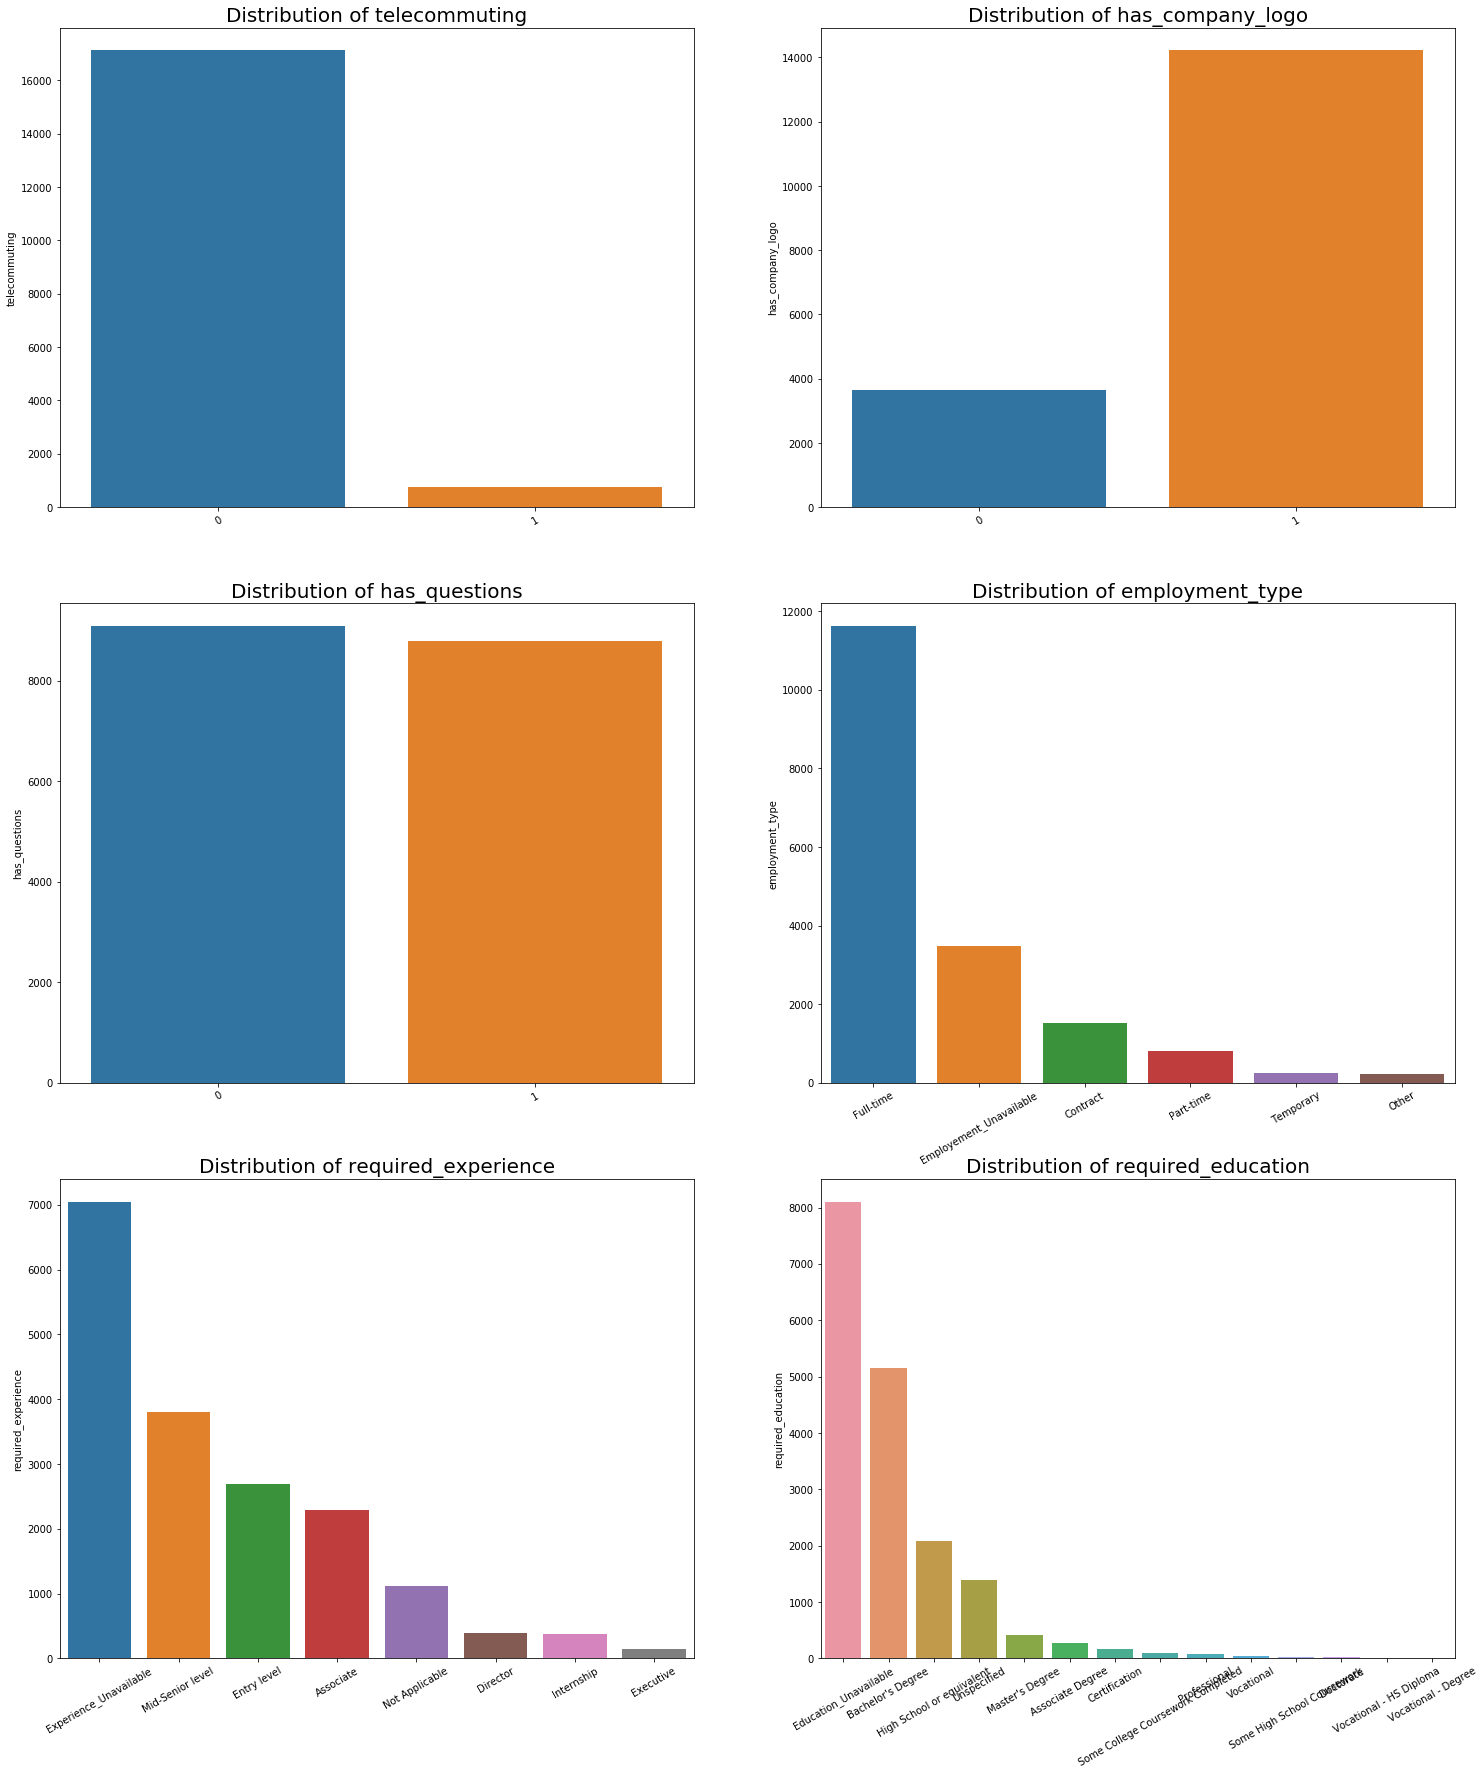

In [43]:
fig, axs = plt.subplots(len(categorical_columns)//2 , 2, figsize = (25,30))
plt_row = 0
plt_col = 0
for i, col in enumerate(categorical_columns):
    if col == 'fraudulent':
        continue
    _ = data[col].value_counts()
    sns.barplot(_.index, _, ax = axs[plt_row][plt_col])
    axs[plt_row][plt_col].set_title(f'Distribution of {col}', size = 20)
    for tick in axs[plt_row,plt_col].get_xticklabels():
        tick.set_rotation(30)
    if plt_col == 0:
        plt_col = 1
    else:
        plt_col = 0
        plt_row += 1
plt.show()

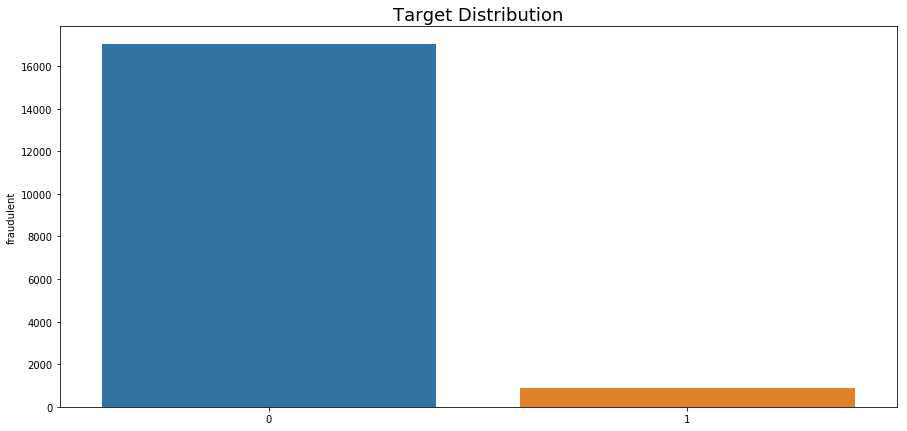

In [47]:
figure = plt.figure(figsize = (15,7))
target_dist = data['fraudulent'].value_counts()
sns.barplot(target_dist.index, target_dist)
plt.title('Target Distribution', size = 18)
plt.show()

In [41]:
data.drop('job_id', axis = 1, inplace = True)
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Education_Unavailable,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Education_Unavailable,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,Employement_Unavailable,Experience_Unavailable,Education_Unavailable,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
